In [1]:
import pandas as pd
# calendar = pd.read_csv('calendar.csv.gz')
# listings = pd.read_csv('listings.csv')
listings2 = pd.read_csv('listings.csv.gz', low_memory=False)
# neighborhoods = pd.read_csv('neighbourhoods.csv')
# neighborhoods_geojson = pd.read_csv('neighbourhoods.geojson')
# reviews = pd.read_csv('reviews.csv')
# reviews2 = pd.read_csv('reviews.csv.gz')


In [2]:
listings_short = listings2.filter(['price','beds', 'bathrooms','accommodates','property_type','neighbourhood','neighbourhood_group_cleansed','zipcode','review_scores_rating', 'room_type','number_of_reviews' ], axis=1)

In [3]:
listings_short.head(10)

,price,beds,bathrooms,accommodates,property_type,neighbourhood,neighbourhood_group_cleansed,zipcode,review_scores_rating,room_type,number_of_reviews
0,$59.00,1.0,NaN,2,Apartment,NaN,Brooklyn,11221,73.0,Private room,14
1,$59.00,3.0,1.0,3,Apartment,Harlem,Manhattan,10026,93.0,Private room,174
2,$149.00,3.0,1.0,4,Apartment,Kensington,Brooklyn,11218,98.0,Private room,9
3,$225.00,1.0,1.0,2,Apartment,Midtown,Manhattan,10018,95.0,Entire home/apt,38
4,$89.00,1.0,1.0,4,House,Red Hook,Brooklyn,11231,79.0,Private room,22
5,$70.00,1.0,1.0,2,Apartment,Williamsburg,Brooklyn,11206,98.0,Private room,36
6,$200.00,4.0,2.0,8,Condominium,Prospect Heights,Brooklyn,11238,99.0,Entire home/apt,140
7,$150.00,1.0,1.0,2,Apartment,Harlem,Manhattan,10027,NaN,Private room,0
8,$89.00,3.0,1.0,3,Guest suite,Clinton Hill,Brooklyn,11238,91.0,Entire home/apt,217
9,$55.00,2.0,1.0,2,Apartment,Clinton Hill,Brooklyn,11205,92.0,Private room,27


In [4]:
import requests

r = requests.get("http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz188d4jlv3m3_9k5bc&state=ny&city=new_york&childtype=zipcode")
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content)
zip_zindex = soup.findAll(['name', 'zindex'])
zipcode_list = soup.findAll('name')
median_prices_list = soup.findAll('zindex')


In [5]:
zipcodes={}
for element in zip_zindex:
    if element in zipcode_list:
        zipcodes[element.contents[0]]={'zipcode':element.contents}
        lastzip = element.contents
    if element in median_prices_list:
        zipcodes[lastzip[0]]={'med_zillow_price': element.contents[0]}


In [6]:
zipcodes

{'10025': {'med_zillow_price': '1034300'},
 '10023': {'zipcode': ['10023']},
 '10002': {'med_zillow_price': '877400'},
 '10467': {'med_zillow_price': '310500'},
 '11226': {'med_zillow_price': '633400'},
 '10016': {'zipcode': ['10016']},
 '11375': {'med_zillow_price': '770800'},
 '11235': {'med_zillow_price': '578700'},
 '10029': {'med_zillow_price': '719400'},
 '10009': {'med_zillow_price': '1051700'},
 '10011': {'zipcode': ['10011']},
 '10128': {'zipcode': ['10128']},
 '11201': {'med_zillow_price': '986200'},
 '10462': {'med_zillow_price': '104300'},
 '10456': {'med_zillow_price': '254600'},
 '11206': {'zipcode': ['11206']},
 '10003': {'med_zillow_price': '1410600'},
 '10463': {'med_zillow_price': '509700'},
 '11212': {'med_zillow_price': '312000'},
 '11230': {'med_zillow_price': '839000'},
 '11209': {'med_zillow_price': '825900'},
 '10024': {'zipcode': ['10024']},
 '11221': {'med_zillow_price': '728600'},
 '11214': {'med_zillow_price': '588100'},
 '10019': {'zipcode': ['10019']},
 '1

In [7]:
import pandas as pd
df = pd.DataFrame(zipcodes)
data = df.T
data["zip"]=data.index
data2 = data.drop(columns = 'zipcode')

In [8]:
full_data = data2.set_index('zip').join(listings_short.set_index('zipcode'))

In [9]:
full_data.head()

,med_zillow_price,price,beds,bathrooms,accommodates,property_type,neighbourhood,neighbourhood_group_cleansed,review_scores_rating,room_type,number_of_reviews
10001,2188500,$150.00,3.0,1.0,4.0,Apartment,Chelsea,Manhattan,89.0,Entire home/apt,394.0
10001,2188500,$123.00,1.0,1.0,2.0,Apartment,Chelsea,Manhattan,92.0,Private room,356.0
10001,2188500,$130.00,1.0,1.0,2.0,Apartment,Chelsea,Manhattan,96.0,Entire home/apt,19.0
10001,2188500,$239.00,1.0,1.0,2.0,Apartment,NaN,Manhattan,99.0,Entire home/apt,26.0
10001,2188500,$400.00,1.0,1.0,3.0,Apartment,NaN,Manhattan,96.0,Entire home/apt,26.0


In [10]:
import seaborn as sns
removed_null = full_data.dropna()

In [11]:
airbnb = full_data.dropna()

airbnb['price'] = airbnb.price.replace('[\$,]', '', regex=True).astype(float)
airbnb['med_zillow_price'] = airbnb.med_zillow_price.apply(pd.to_numeric, errors='coerce')
airbnb['borough'] = airbnb['neighbourhood_group_cleansed']
airbnb.drop(columns = ['neighbourhood_group_cleansed'])
airbnb.dtypes

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

med_zillow_price                  int64
price                           float64
beds                            float64
bathrooms                       float64
accommodates                    float64
property_type                    object
neighbourhood                    object
neighbourhood_group_cleansed     object
review_scores_rating            float64
room_type                        object
number_of_reviews               float64
borough                          object
dtype: object

In [12]:
airbnb.price.describe()

count    23742.000000
mean       135.392090
std        223.046817
min          0.000000
25%         65.000000
50%        100.000000
75%        155.000000
max      10000.000000
Name: price, dtype: float64

In [13]:
airbnb.borough.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
#Takes all neighborhoods with more than 200 listings
airbnb = airbnb.groupby('neighbourhood').filter(lambda x: len(x) >= 100)
#Takes all property types with more than 50 listings
airbnb = airbnb.groupby('property_type').filter(lambda x: len(x) >= 50)

In [15]:
airbnb = airbnb[airbnb['price'] <= 200]

In [16]:
airbnb.price.describe()

count    18237.000000
mean       101.140867
std         45.982097
min          0.000000
25%         65.000000
50%         95.000000
75%        135.000000
max        200.000000
Name: price, dtype: float64

In [17]:
airbnb.borough.unique()

array(['Manhattan', 'Brooklyn', 'Queens'], dtype=object)

In [18]:
airbnb['property_type'].value_counts()

Apartment             14815
House                  1567
Townhouse               714
Loft                    451
Condominium             378
Serviced apartment      133
Guest suite             125
Boutique hotel           54
Name: property_type, dtype: int64

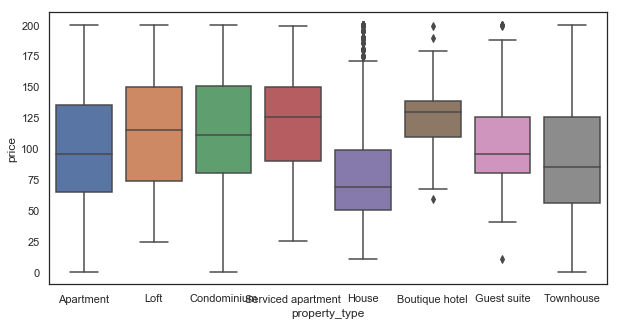

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='price', x='property_type', data = airbnb.loc[airbnb['price'] <= 500.00])
plt.rcParams['figure.figsize']=(5,5)

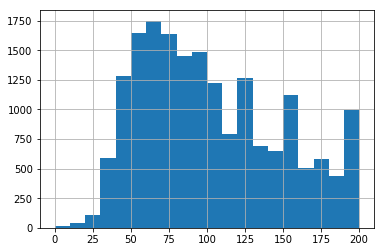

In [20]:
#price distrobution for AirBnB rentals less than $600
airbnb['price'].loc[airbnb['price'] <= 600.00].hist(bins=20)
plt.rcParams['figure.figsize']=(10,5)

In [21]:
full_data.corr()

,beds,bathrooms,accommodates,review_scores_rating,number_of_reviews
beds,1.000000,0.380149,0.788470,-0.023016,0.090228
bathrooms,0.380149,1.000000,0.342352,-0.005378,-0.017352
accommodates,0.788470,0.342352,1.000000,-0.015865,0.106964
review_scores_rating,-0.023016,-0.005378,-0.015865,1.000000,0.016059
number_of_reviews,0.090228,-0.017352,0.106964,0.016059,1.000000


In [22]:
def remove_apostrophe(dataframe):
    dataframe.columns = [x.replace("'","") for x in dataframe.columns]
    
def remove_period(dataframe):
    dataframe.columns = [x.replace(".","") for x in dataframe.columns]
    
def remove_dash(dataframe):
    dataframe.columns = [x.replace("-","") for x in dataframe.columns]
    
def remove_slash(dataframe):
    dataframe.columns = [x.replace("/","") for x in dataframe.columns]
    
def remove_spaces(dataframe):
    dataframe.columns = [x.replace(" ","") for x in dataframe.columns]
    
remove_apostrophe(airbnb)
remove_period(airbnb)
remove_dash(airbnb)
remove_slash(airbnb)
remove_spaces(airbnb)

In [23]:
abs(airbnb.corr())>0.75

,med_zillow_price,price,beds,bathrooms,accommodates,review_scores_rating,number_of_reviews
med_zillow_price,True,False,False,False,False,False,False
price,False,True,False,False,False,False,False
beds,False,False,True,False,True,False,False
bathrooms,False,False,False,True,False,False,False
accommodates,False,False,True,False,True,False,False
review_scores_rating,False,False,False,False,False,True,False
number_of_reviews,False,False,False,False,False,False,True


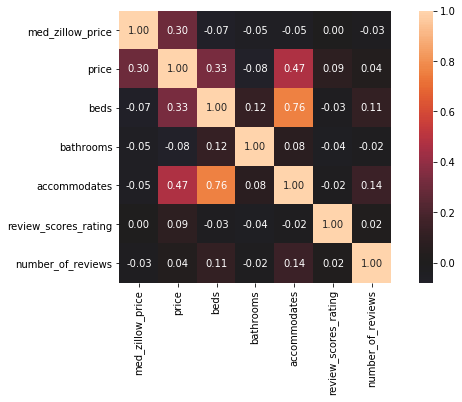

In [24]:
sns.heatmap(airbnb.corr(), center=0, cbar = True, annot=True, square = True, fmt = '.2f');


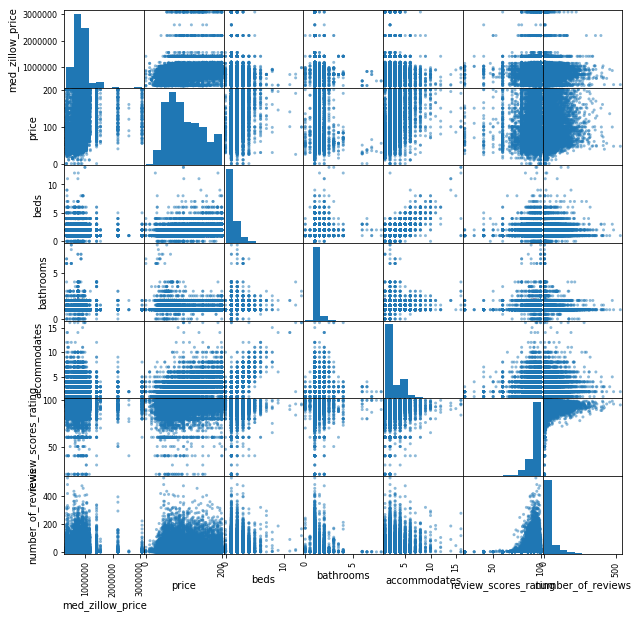

In [25]:
pd.plotting.scatter_matrix(airbnb,figsize  = [10, 10]);

In [26]:
#Get dummy variables for all of our categorial variables. That's neighborhoods, boroughs, and property_types
neighborhoods = pd.get_dummies(airbnb["neighbourhood"], prefix="hood", drop_first = True)
boroughs = pd.get_dummies(airbnb['borough'], prefix = "borough", drop_first = True)
property_type = pd.get_dummies(airbnb['property_type'], prefix = "type", drop_first = True)
beds = pd.get_dummies(airbnb['beds'], prefix = "beds", drop_first = True)
bathrooms = pd.get_dummies(airbnb['bathrooms'], prefix = "bathrooms", drop_first = True)
price = airbnb['price']
med_zillow_price = airbnb['med_zillow_price']
accommodates = airbnb['accommodates']
review_scores_rating = airbnb['review_scores_rating']
number_of_reviews = airbnb['number_of_reviews']
#create a dataframe with categorial dummy variables and numerical variables
data_fin = pd.concat([boroughs, neighborhoods, property_type, price, beds, bathrooms, med_zillow_price, accommodates, review_scores_rating, number_of_reviews], axis=1)

In [27]:
data_fin.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_Bay Ridge,hood_Bedford-Stuyvesant,hood_Boerum Hill,hood_Brooklyn Heights,hood_Bushwick,hood_Canarsie,hood_Carroll Gardens,...,bathrooms_4.0,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,4.0,89.0,394.0
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,2.0,92.0,356.0
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,2.0,96.0,19.0
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,4.0,89.0,23.0
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,2.0,90.0,9.0


In [28]:
def remove_apostrophe(dataframe):
    dataframe.columns = [x.replace("'","") for x in dataframe.columns]
    
def remove_period(dataframe):
    dataframe.columns = [x.replace(".","") for x in dataframe.columns]
    
def remove_dash(dataframe):
    dataframe.columns = [x.replace("-","") for x in dataframe.columns]
    
def remove_slash(dataframe):
    dataframe.columns = [x.replace("/","") for x in dataframe.columns]

def remove_spaces(dataframe):
    dataframe.columns = [x.replace(" ","") for x in dataframe.columns]
    
remove_apostrophe(data_fin)
remove_period(data_fin)
remove_dash(data_fin)
remove_slash(data_fin)
remove_spaces(data_fin)

In [29]:
outcome = 'price'
predictors = data_fin.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + " ~ " + pred_sum

# model2.summary()

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
#Uses the Feature Ranking w/ Recursive Feature Elimination Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Choose n top features based on p-values
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(predictors, data_fin["price"])

In [32]:
#Responds with variables and whether they meet top n features or not
selector.support_ 

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [33]:
#Responds with ranking of variables
selector.ranking_

array([25, 58, 14, 11, 15, 29, 31,  1,  9, 30, 63, 73, 19, 17, 13,  8, 49,
        6, 62,  1, 57,  7,  3, 12, 27, 24, 65, 23, 18, 41, 50, 64,  1,  1,
        5, 16, 20, 77, 48, 28, 26,  2,  1, 10, 55, 54, 22, 21,  4, 47, 53,
       60, 74, 68, 67, 78, 61, 75, 76, 66, 56, 35, 34, 37, 32, 40, 44, 51,
       71, 59, 70, 72, 69, 46, 43, 45, 36, 33, 38, 39, 42, 81, 52, 79, 80])

In [34]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[-33.08231231 -31.34632359 -31.1608408  -30.4295606  -35.61736253]
104.34018862184358


In [35]:
#Next thing to do is figure out an automated way to train just the "yes" variables
#Google model fitting using feature ranking!!

In [36]:
features = data_fin.drop('price', axis=1)
target = data_fin.price

In [117]:
data_fin.columns

Index(['borough_Manhattan', 'borough_Queens', 'hood_Astoria', 'hood_BayRidge',
       'hood_BedfordStuyvesant', 'hood_BoerumHill', 'hood_BrooklynHeights',
       'hood_Bushwick', 'hood_Canarsie', 'hood_CarrollGardens', 'hood_Chelsea',
       'hood_Chinatown', 'hood_ClintonHill', 'hood_CrownHeights',
       'hood_DitmarsSteinway', 'hood_EastFlatbush', 'hood_EastHarlem',
       'hood_EastNewYork', 'hood_EastVillage', 'hood_Elmhurst',
       'hood_FinancialDistrict', 'hood_Flatbush', 'hood_Flushing',
       'hood_ForestHills', 'hood_FortGreene', 'hood_Gowanus',
       'hood_GramercyPark', 'hood_Greenpoint', 'hood_GreenwoodHeights',
       'hood_HamiltonHeights', 'hood_Harlem', 'hood_HellsKitchen',
       'hood_JacksonHeights', 'hood_Jamaica', 'hood_Kensington',
       'hood_LeffertsGarden', 'hood_LongIslandCity', 'hood_LowerEastSide',
       'hood_MorningsideHeights', 'hood_ParkSlope', 'hood_ProspectHeights',
       'hood_Ridgewood', 'hood_SunsetPark', 'hood_TheRockaways',
       'hood_Tr

In [38]:
data_fin.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_BrooklynHeights,hood_Bushwick,hood_Canarsie,hood_CarrollGardens,...,bathrooms_40,bathrooms_60,bathrooms_65,bathrooms_70,bathrooms_75,bathrooms_80,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,4.0,89.0,394.0
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,2.0,92.0,356.0
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,2.0,96.0,19.0
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,4.0,89.0,23.0
10001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2188500,2.0,90.0,9.0


In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [124]:
#Create training and testing set. Training is 80% of entire set
features = data_fin.drop('price', axis=1)
target = data_fin.price
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)

lm = linear_model.LinearRegression()
model_base = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)


print("Base MAE: " , metrics.mean_absolute_error(y_test, y_pred))
print("Base MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("Base RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Base MAE:  26.1907765789513
Base MSE:  1124.5837156158434
Base RMSE:  33.534813487118775


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


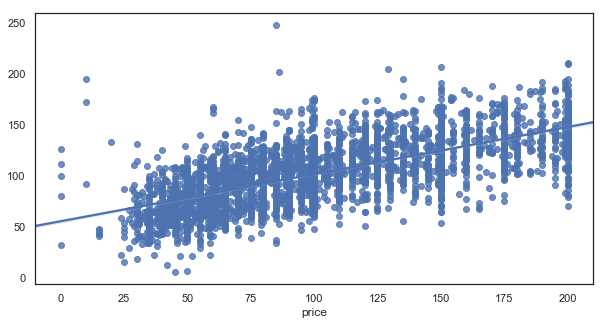

In [125]:
sns.regplot(y_test, y_pred)

In [126]:
X_train.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_BrooklynHeights,hood_Bushwick,hood_Canarsie,hood_CarrollGardens,...,bathrooms_40,bathrooms_60,bathrooms_65,bathrooms_70,bathrooms_75,bathrooms_80,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
11216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,741000,2.0,97.0,197.0
11101,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,798500,2.0,99.0,16.0
11236,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,353700,3.0,97.0,74.0
11211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,902300,2.0,90.0,13.0
10027,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,930700,2.0,100.0,1.0


In [127]:
from sklearn import preprocessing
from sklearn import pipeline
#Create training and testing set. Training is 80% of entire set
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)
scaler = preprocessing.StandardScaler()
#Take out all categorical variables, because there's no point in scaling 1's and 0's
scaler.fit(X_train.iloc[:,-6:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [128]:
X_train.columns[-6:]

Index(['bathrooms_75', 'bathrooms_80', 'med_zillow_price', 'accommodates',
       'review_scores_rating', 'number_of_reviews'],
      dtype='object')

In [129]:
#Create a new dataframe with new scaled numerical variables
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,-6:]), columns=X_train.columns[-6:], index = X_train.index)


#Add back in your categorical variables
features_scaled_train = pd.concat([X_train.iloc[:,:-6],features_scaled_train], axis=1)


features_scaled_train.head()

#if there's a value less than the mean, the scaled number will be negative. This is because the scaled number
#is z= (x-u)/s.
#x = value
#u = mean of training samples
#s = standard deviation

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_BrooklynHeights,hood_Bushwick,hood_Canarsie,hood_CarrollGardens,...,bathrooms_40,bathrooms_60,bathrooms_65,bathrooms_70,bathrooms_75,bathrooms_80,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
11216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.008279,-0.011709,-0.264763,-0.407060,0.391192,3.622527
11101,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.008279,-0.011709,-0.081839,-0.407060,0.637050,-0.289476
11236,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,-0.008279,-0.011709,-1.496873,0.308951,0.391192,0.964094
11211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.008279,-0.011709,0.248378,-0.407060,-0.469311,-0.354316
10027,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.008279,-0.011709,0.338727,-0.407060,0.759979,-0.613676


In [130]:
X_test.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_BrooklynHeights,hood_Bushwick,hood_Canarsie,hood_CarrollGardens,...,bathrooms_40,bathrooms_60,bathrooms_65,bathrooms_70,bathrooms_75,bathrooms_80,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
11385,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,487800,2.0,98.0,36.0
10002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,877400,2.0,80.0,1.0
11238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,786400,5.0,97.0,6.0
10009,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1051700,4.0,93.0,3.0
11211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,902300,4.0,100.0,6.0


In [131]:
#Create a new dataframe with new scaled numerical variables
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,-6:]), columns=X_train.columns[-6:], index = X_test.index)


#Add back in your categorical variables
features_scaled_test = pd.concat([X_test.iloc[:,:-6],features_scaled_test], axis=1)

features_scaled_test.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_BrooklynHeights,hood_Bushwick,hood_Canarsie,hood_CarrollGardens,...,bathrooms_40,bathrooms_60,bathrooms_65,bathrooms_70,bathrooms_75,bathrooms_80,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
11385,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.008279,-0.011709,-1.070263,-0.407060,0.514121,0.142789
10002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.008279,-0.011709,0.169164,-0.407060,-1.698600,-0.613676
11238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.008279,-0.011709,-0.120332,1.740974,0.391192,-0.505609
10009,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.008279,-0.011709,0.723662,1.024963,-0.100524,-0.570449
11211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.008279,-0.011709,0.248378,1.024963,0.759979,-0.505609


In [132]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_many_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
features_many_train.head()
#preprocessing.PolynomialFeatures = Generate polynomial and interaction features.
#Generate a new feature matrix consisting of all polynomial combinations of the features with 
#degree less than or equal to the specified degree. For example, if an input sample is two dimensional 
#and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
#poly.fit_transform = Fit to data, then transform it.

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_BrooklynHeights,hood_Bushwick,hood_Canarsie,hood_CarrollGardens,...,med_zillow_price^2,med_zillow_price accommodates,med_zillow_price review_scores_rating,med_zillow_price number_of_reviews,accommodates^2,accommodates review_scores_rating,accommodates number_of_reviews,review_scores_rating^2,review_scores_rating number_of_reviews,number_of_reviews^2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.070099,0.107774,-0.103573,-0.959109,0.165698,-0.159239,-1.474586,0.153031,1.417103,13.122705
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006698,0.033313,-0.052135,0.023690,0.165698,-0.259317,0.117834,0.405832,-0.184411,0.083797
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.240628,-0.462461,-0.585564,-1.443126,0.095451,0.120859,0.297858,0.153031,0.377146,0.929477
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.061692,-0.101105,-0.116567,-0.088004,0.165698,0.191038,0.144228,0.220252,0.166284,0.125540
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114736,-0.137882,0.257425,-0.207868,0.165698,-0.309357,0.249803,0.577568,-0.466380,0.376598


In [133]:
features_many_test = pd.DataFrame(poly.fit_transform(features_scaled_test), columns=poly.get_feature_names(features_scaled_test.columns))
features_many_test.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_BrooklynHeights,hood_Bushwick,hood_Canarsie,hood_CarrollGardens,...,med_zillow_price^2,med_zillow_price accommodates,med_zillow_price review_scores_rating,med_zillow_price number_of_reviews,accommodates^2,accommodates review_scores_rating,accommodates number_of_reviews,review_scores_rating^2,review_scores_rating number_of_reviews,number_of_reviews^2
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.145463,0.435661,-0.550244,-0.152822,0.165698,-0.209278,-0.058124,0.264320,0.073411,0.020389
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028617,-0.068860,-0.287342,-0.103812,0.165698,0.691432,0.249803,2.885241,1.042389,0.376598
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014480,-0.209495,-0.047073,0.060841,3.030991,0.681055,-0.880252,0.153031,-0.197790,0.255641
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.523686,0.741726,-0.072745,-0.412812,1.050549,-0.103033,-0.584689,0.010105,0.057344,0.325412
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.061692,0.254578,0.188762,-0.125582,1.050549,0.778950,-0.518231,0.577568,-0.384252,0.255641


In [134]:
from sklearn.feature_selection import VarianceThreshold

#Feature selector that removes all low-variance features.
#This feature selection algorithm looks only at the features (X), not the desired outputs (y), 
#and can thus be used for unsupervised learning.

thresholder = VarianceThreshold(threshold=.5)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]


In [135]:
features_selected_train = variance_threshold_selector(features_many_train)

In [136]:
# features_selected_train.head()
len(features_selected_train.columns)

36

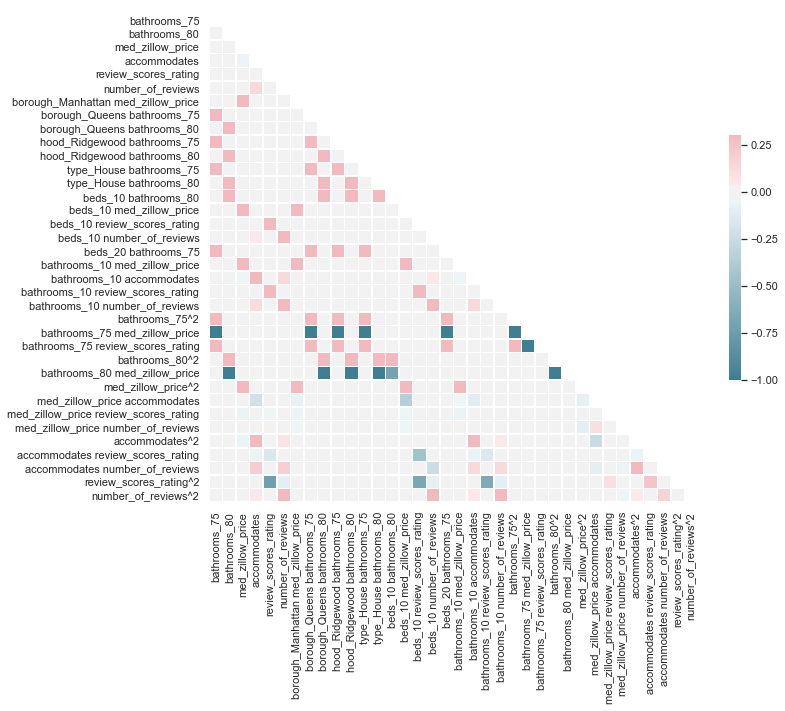

In [137]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix between selected features that have high variance
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [138]:
# Create correlation matrix, take absolute values of each correlation
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [139]:
to_drop

['borough_Queens bathrooms_75',
 'borough_Queens bathrooms_80',
 'hood_Ridgewood bathrooms_75',
 'hood_Ridgewood bathrooms_80',
 'type_House bathrooms_75',
 'type_House bathrooms_80',
 'beds_20 bathrooms_75',
 'bathrooms_10 med_zillow_price',
 'bathrooms_75^2',
 'bathrooms_75 med_zillow_price',
 'bathrooms_75 review_scores_rating',
 'bathrooms_80^2',
 'bathrooms_80 med_zillow_price']

In [140]:
features_selected_train.drop(columns=to_drop, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [141]:
#SelectKBest = Select features according to the k highest scores.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [142]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [143]:
test = SelectKBest(score_func=mutual_info_regression, k=13)
fit = test.fit(features_selected_train, y_train)

In [144]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

,med_zillow_price,accommodates,beds_10 bathrooms_80,beds_10 med_zillow_price,beds_10 review_scores_rating,beds_10 number_of_reviews,bathrooms_10 accommodates,med_zillow_price^2,med_zillow_price accommodates,med_zillow_price review_scores_rating,accommodates^2,accommodates review_scores_rating,accommodates number_of_reviews
0,-0.264763,-0.407060,-0.011709,-0.264763,0.391192,3.622527,-0.407060,0.070099,0.107774,-0.103573,0.165698,-0.159239,-1.474586
1,-0.081839,-0.407060,-0.000000,-0.000000,0.000000,-0.000000,-0.407060,0.006698,0.033313,-0.052135,0.165698,-0.259317,0.117834
2,-1.496873,0.308951,-0.011709,-1.496873,0.391192,0.964094,0.308951,2.240628,-0.462461,-0.585564,0.095451,0.120859,0.297858
3,0.248378,-0.407060,-0.011709,0.248378,-0.469311,-0.354316,-0.407060,0.061692,-0.101105,-0.116567,0.165698,0.191038,0.144228
4,0.338727,-0.407060,-0.011709,0.338727,0.759979,-0.613676,-0.407060,0.114736,-0.137882,0.257425,0.165698,-0.309357,0.249803


In [145]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=13)

In [146]:
features_selected_train.head()

,med_zillow_price,accommodates,beds_10 bathrooms_80,beds_10 med_zillow_price,beds_10 review_scores_rating,beds_10 number_of_reviews,bathrooms_10 accommodates,med_zillow_price^2,med_zillow_price accommodates,med_zillow_price review_scores_rating,accommodates^2,accommodates review_scores_rating,accommodates number_of_reviews
0,-0.264763,-0.407060,-0.011709,-0.264763,0.391192,3.622527,-0.407060,0.070099,0.107774,-0.103573,0.165698,-0.159239,-1.474586
1,-0.081839,-0.407060,-0.000000,-0.000000,0.000000,-0.000000,-0.407060,0.006698,0.033313,-0.052135,0.165698,-0.259317,0.117834
2,-1.496873,0.308951,-0.011709,-1.496873,0.391192,0.964094,0.308951,2.240628,-0.462461,-0.585564,0.095451,0.120859,0.297858
3,0.248378,-0.407060,-0.011709,0.248378,-0.469311,-0.354316,-0.407060,0.061692,-0.101105,-0.116567,0.165698,0.191038,0.144228
4,0.338727,-0.407060,-0.011709,0.338727,0.759979,-0.613676,-0.407060,0.114736,-0.137882,0.257425,0.165698,-0.309357,0.249803


In [147]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, y_train)


In [148]:
features_selected_test = features_many_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print("K Best Feature Selection MAE: " ,metrics.mean_absolute_error(y_test, y_pred))
print("K Best Feature Selection MSE: " , metrics.mean_squared_error(y_test, y_pred))
print("K Best Feature Selection RMSE: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


K Best Feature Selection MAE:  27.88995905534085
K Best Feature Selection MSE:  1236.455168444332
K Best Feature Selection RMSE:  35.16326447365677


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


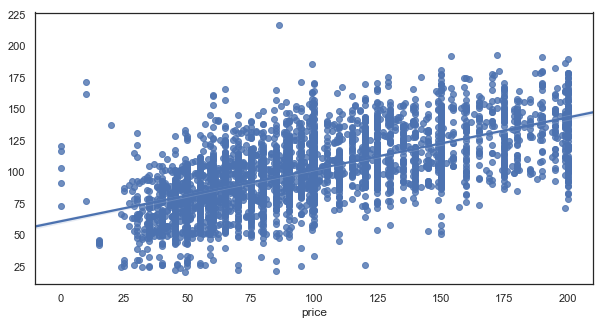

In [149]:
sns.regplot(y_test, y_pred)

In [151]:
## training the model
from sklearn.linear_model import Lasso


lassoReg = Lasso(alpha=0.05, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

#calculating mse

print('Lasso MSE:', metrics.mean_squared_error(y_test, y_pred))
print('Lasso RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#this many Standard Deviations away from the mean..?
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std())



coef = pd.DataFrame(data=lassoReg.coef_, index=X_train.columns )
model_coef = coef.sort_values(by=0).T

#model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(16,8))


Lasso MSE: 1472.5974944148807
Lasso RMSE: 38.374438033864166
0.8376669926665681


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


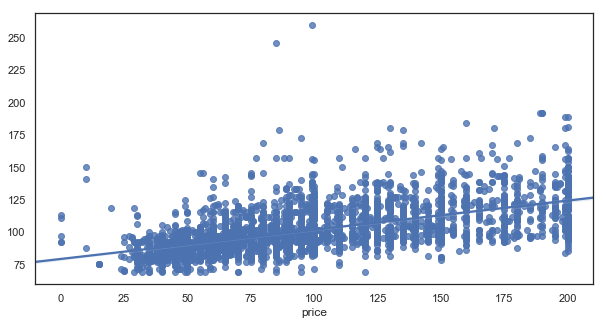

In [152]:
sns.regplot(y_test, y_pred)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


y = data_fin.price
x = data_fin.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=600, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('Random Forest RMSE: %.3f' % rmse_rf)
print('Random Forest R^2: %.3f' % (r2_score(y_test, y_test_pred)))

Random Forest RMSE: 35.132
Random Forest R^2: 0.413


# Most important features in Random Forest predictors

In [69]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
82,accommodates,0.287992
81,med_zillow_price,0.221082
84,number_of_reviews,0.172650
83,review_scores_rating,0.101196
69,bathrooms_10,0.013213
57,beds_20,0.011778
56,beds_10,0.011578
52,type_House,0.009659
50,type_Condominium,0.007725
53,type_Loft,0.007498


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


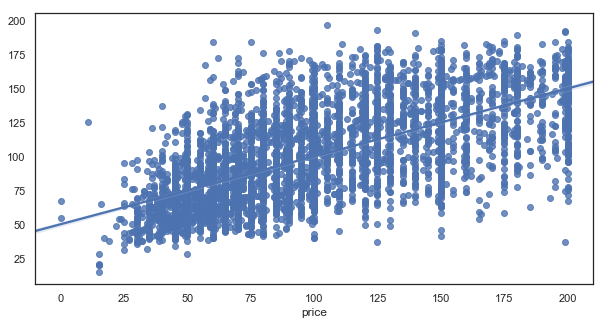

In [70]:
#Random Forest 
sns.regplot(y_test, y_test_pred)